<a href="https://colab.research.google.com/github/MarinKabic/FIFA21-Python/blob/main/FIFA21%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('fifa21 raw data v2.csv')

# First look into the data

In [38]:
df.shape

(18979, 77)

In [4]:
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [5]:
# display all the columns when previewing data
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [39]:
# filtering out unecessary columns
df_pc = df[['Name', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Height', 'Weight',
       'Preferred Foot', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'W/F', 'SM', 'IR']]
df_pc.head()

,Name,Nationality,Age,↓OVA,POT,Club,Contract,Height,Weight,Preferred Foot,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,W/F,SM,IR
0,L. Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,170cm,72kg,Left,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,4 ★,4★,5 ★
1,Cristiano Ronaldo,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,187cm,83kg,Right,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,4 ★,5★,5 ★
2,J. Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,188cm,87kg,Right,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,3 ★,1★,3 ★
3,K. De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,181cm,70kg,Right,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,5 ★,4★,4 ★
4,Neymar Jr,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,175cm,68kg,Right,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,5 ★,5★,5 ★


In [40]:
# duplicates
dupl = df_pc.duplicated().sum()
print('There are', dupl,'duplicates in this dataset.')

There are 0 duplicates in this dataset.


In [41]:
# null values
nvalues = df_pc.columns[df_pc.isnull().sum() != 0][0]
print('The following columns have missing values:', nvalues)

The following columns have missing values: Loan Date End


In [42]:
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            18979 non-null  object
 1   Nationality     18979 non-null  object
 2   Age             18979 non-null  int64 
 3   ↓OVA            18979 non-null  int64 
 4   POT             18979 non-null  int64 
 5   Club            18979 non-null  object
 6   Contract        18979 non-null  object
 7   Height          18979 non-null  object
 8   Weight          18979 non-null  object
 9   Preferred Foot  18979 non-null  object
 10  Best Position   18979 non-null  object
 11  Joined          18979 non-null  object
 12  Loan Date End   1013 non-null   object
 13  Value           18979 non-null  object
 14  Wage            18979 non-null  object
 15  Release Clause  18979 non-null  object
 16  W/F             18979 non-null  object
 17  SM              18979 non-null  object
 18  IR    

# Cleaning

In [ ]:
# setting full column names

column_renames = {
    '↓OVA': 'Overall Rating',
    'POT': 'Potential',
    'W/F': 'Weak Foot',
    'SM' : 'Skill Moves',
    'IR' : 'International Reputation'
 }

df_pc.rename(columns=column_renames, inplace=True)

Removing \n strings from Club column

In [ ]:
df_pc['Club'] = df_pc['Club'].str.replace('\n', '', regex=True)

Converting Height values (feet & inches > centimeters)

In [45]:
# unique height values
df_pc['Height'].unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [46]:
def height_converter(x):
  if 'cm' in x:
    return int(x.replace('cm', ''))
  else:
    height = x.split("'")
    return round(int(height[0])*30.48+int(height[1][:-1])*2.54)

# does it work?
print(height_converter('6\'0"'))

183


In [ ]:
df_pc['Height'] = df_pc['Height'].apply(height_converter)

In [48]:
df_pc['Height'].dtypes

dtype('int64')

In [49]:
# checking the converted column
df_pc['Height'].unique()

array([170, 187, 188, 181, 175, 184, 191, 178, 193, 185, 199, 173, 168,
       176, 177, 183, 180, 189, 179, 195, 172, 182, 186, 192, 165, 194,
       167, 196, 163, 190, 174, 169, 171, 197, 200, 166, 164, 198, 201,
       158, 162, 161, 160, 203, 157, 156, 202, 159, 206, 155])

Converting Weight values (lbs > kg)

In [50]:
# unique weight values
df_pc['Weight'].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [51]:
def weight_converter(x):
  if 'kg' in x:
    return int(x.replace('kg', ''))
  else:
    return round(int(x[:-3])*0.45359237)

# does it work?
print(weight_converter('157lbs'))

71


In [ ]:
df_pc['Weight'] = df_pc['Weight'].apply(weight_converter)

In [53]:
df_pc['Weight'].unique()

array([ 72,  83,  87,  70,  68,  80,  71,  91,  73,  85,  92,  69,  84,
        96,  81,  82,  75,  86,  89,  74,  76,  64,  78,  90,  66,  60,
        94,  79,  67,  65,  59,  61,  93,  88,  97,  77,  62,  63,  95,
       100,  58,  98, 103,  99, 102,  56, 101,  57,  55, 104, 107, 110,
        53,  50,  54,  52])

Renaming the converted columns

In [ ]:
df_pc.rename(columns = {'Height':'Height (cm)', 'Weight': 'Weight (kg)'}, inplace=True)

In [56]:
df_pc.columns

Index(['Name', 'Nationality', 'Age', 'Overall Rating', 'Potential', 'Club',
       'Contract', 'Height (cm)', 'Weight (kg)', 'Preferred Foot',
       'Best Position', 'Joined', 'Loan Date End', 'Value', 'Wage',
       'Release Clause', 'Weak Foot', 'Skill Moves',
       'International Reputation'],
      dtype='object')

Converting Joined date (to datetime)

In [ ]:
df_pc['Joined'] = pd.to_datetime(df_pc['Joined'])

Extracting Year, Month, Day from Joined date

In [ ]:
df_pc['Year Joined'] = df_pc['Joined'].dt.year
df_pc['Month Joined'] = df_pc['Joined'].dt.month
df_pc['Day Joined'] = df_pc['Joined'].dt.day

Cleaning Value / Wage / Release Clause columns

In [59]:
# Values that dont contain K or M
df_pc[~df_pc['Value'].str.contains('K|M')]['Value'].unique()

array(['€0'], dtype=object)

In [60]:
# Wages that dont contain K
df_pc[~df_pc['Wage'].str.contains('K')]['Wage'].unique()

array(['€0', '€900', '€850', '€500', '€700', '€950', '€750', '€650',
       '€600', '€800', '€550'], dtype=object)

In [61]:
# Release Clauses that dont contain K or M
df_pc[~df_pc['Release Clause'].str.contains('K|M')]['Release Clause'].unique()

array(['€0'], dtype=object)

In [62]:
def formating_values(x):
  x = x.replace('€', '')
  if 'M' in x:
    return int(float(x[:-1])*1000000)
  elif 'K' in x:
    return int(float(x[:-1])*1000)
  else:
    return round(float(x))

# does it work?
print(formating_values('€190.8M'))

190800000


In [ ]:
df_pc['Value'] = df_pc['Value'].apply(formating_values)
df_pc['Wage'] = df_pc['Wage'].apply(formating_values)
df_pc['Release Clause'] = df_pc['Release Clause'].apply(formating_values)

Removing the ★ from: Weak Foot, 	Skill Moves, International Reputation

In [64]:
print("Weak foot unique values:", df_pc['Weak Foot'].unique())
print("Skill Moves unique values:", df_pc['Skill Moves'].unique())
print("International Reputation unique values:", df_pc['International Reputation'].unique())

Weak foot unique values: ['4 ★' '3 ★' '5 ★' '2 ★' '1 ★']
Skill Moves unique values: ['4★' '5★' '1★' '2★' '3★']
International Reputation unique values: ['5 ★' '3 ★' '4 ★' '2 ★' '1 ★']


In [ ]:
df_pc['Weak Foot'] = df_pc['Weak Foot'].str.strip('★').str.strip().astype(int)
df_pc['Skill Moves'] = df_pc['Skill Moves'].str.strip('★').str.strip().astype(int)
df_pc['International Reputation'] = df_pc['International Reputation'].str.strip('★').str.strip().astype(int)

In [66]:
df_pc[['Weak Foot', 'Skill Moves', 'International Reputation']].head()

,Weak Foot,Skill Moves,International Reputation
0,4,4,5
1,4,5,5
2,3,1,3
3,5,4,4
4,5,5,5


# Exploration

Players with more than 10 years in a club

In [ ]:
# the data is from 2020 so we will only analyze it based on years at the club
df_pc['10yearClub'] = 2020-df_pc['Year Joined']

In [68]:
years_in_club = df_pc[df_pc['10yearClub']>10]['Name'].unique()
print('Players that are more than 10 years in the current club:', years_in_club)

Players that are more than 10 years in the current club: ['L. Messi' 'K. Benzema' 'Sergio Ramos' 'G. Chiellini' 'Sergio Busquets'
 'T. Müller' 'Piqué' 'Muniain' 'Marcelo' 'L. Bender' 'Mario Gaspar'
 'I. Akinfeev' 'S. Coleman' 'D. Rose' 'Hugo Mallo' 'De Marcos' 'Guilherme'
 '�. Radu' 'Oier' 'A. Dzagoev' 'C. McGregor' 'J. Forrest' 'A. Zamorado'
 'A. Pyatov' 'A. Aguilmera' 'T. Jantschke' 'G. Schennikov' 'A. Ulmer'
 'S. Brown' 'M. Tekdemir' 'F. Magnanelli' 'M. Noble' 'J. Corona'
 'D. Garmash' 'M. Schmelzer' 'D. Limberský' 'Sergio' 'V. Sabanter'
 'I. Khune' 'A. Shunin' 'V. Manceau' 'Kim Jin Hyeon' 'J. Domínguez'
 'S. Bossut' 'Y. Maruhashi' 'Tarantini' 'Go Yo Han' 'P. Karlsson'
 'C. Toselli' 'R. Grant' 'M. Männel' 'M. Schnatterer' 'M. Besler'
 'Kim Kwang Suk' 'Zheng Zheng' 'Wang Shenchao' 'G. Zusi' 'K. Noborizato'
 'R. Shawcross' 'N. Uysal' 'J. Moulin' 'A. Ríos' 'Choi Chul Soon'
 'A. Bonnet' 'N. Al Abed' 'Ji Xiang' 'Lee Dong Gook' 'R. Williams'
 'M. Schönbächler' 'S. Aquino' 'A. Considine' '

Players per country

In [69]:
players_nationality = df_pc['Nationality'].value_counts().reset_index()
players_nationality.columns = ['Nationality', 'Player Count']
players_nationality

,Nationality,Player Count
0,England,1705
1,Germany,1195
2,Spain,1065
3,France,1003
4,Argentina,943
...,...,...
159,Malawi,1
160,Rwanda,1
161,São Tomé & Príncipe,1
162,Aruba,1


In [117]:
#sns.reset_defaults()
sns.set_style('darkgrid')

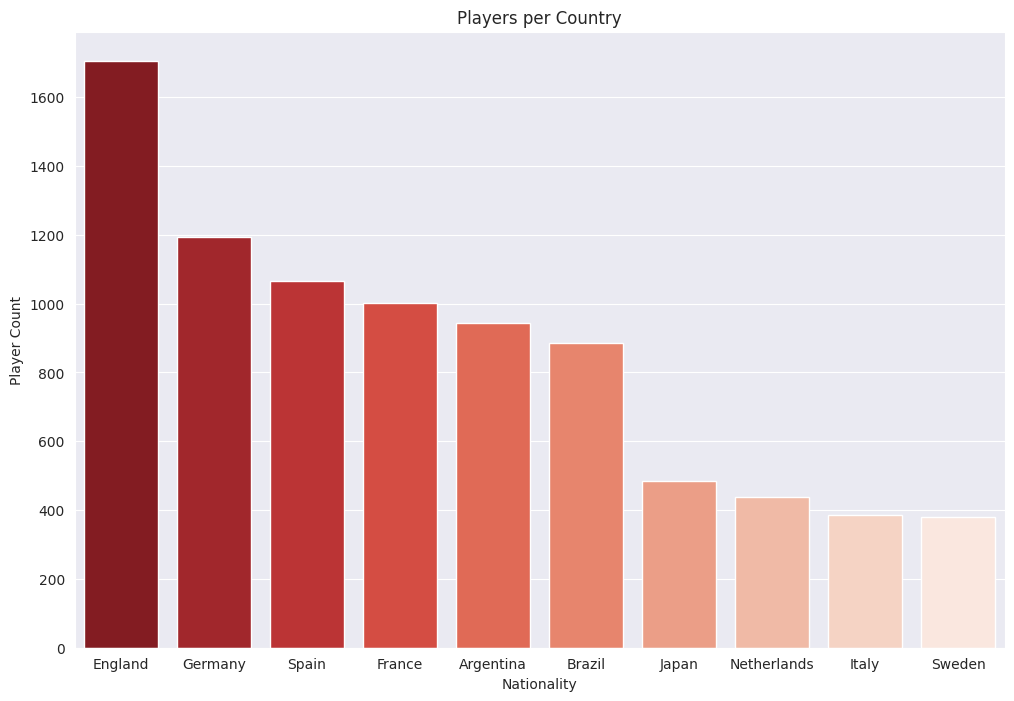

In [118]:
plt.figure(figsize=(12,8))
sns.barplot(x='Nationality', y='Player Count', data = players_nationality[:10], palette='Reds_r')
plt.title('Players per Country')
plt.show()

Player count per country vs. Overall ratings

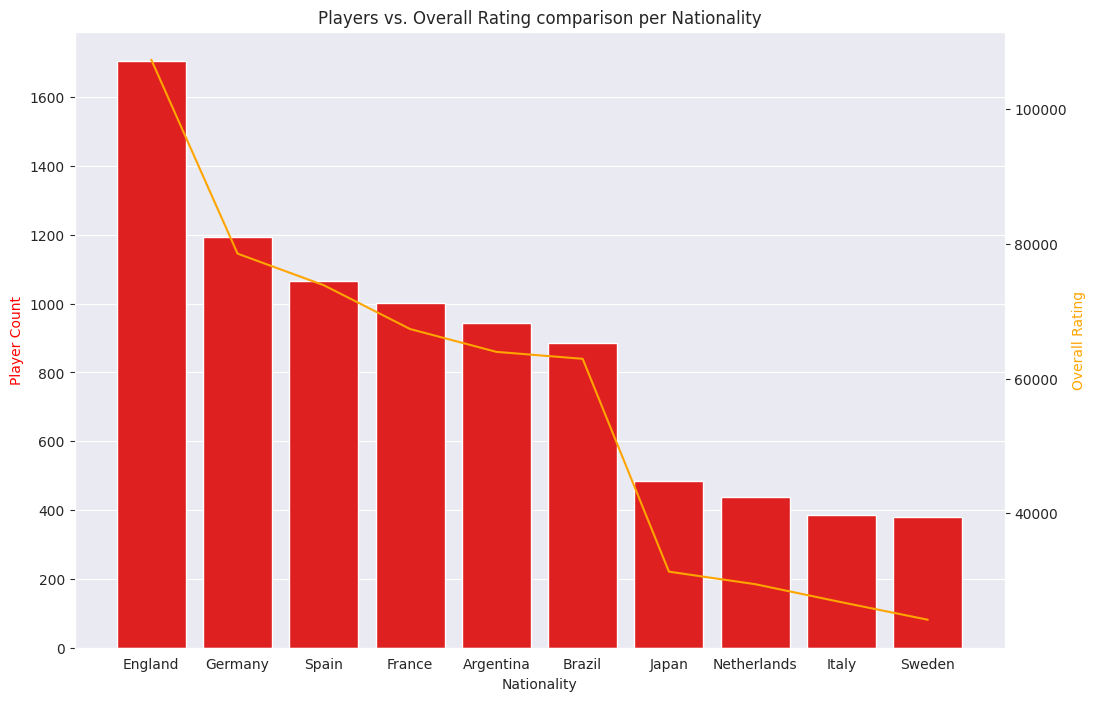

In [119]:
# to compare player count per country and overall ratings we will create an secondary Y axis

ova_rat_plot = df_pc.groupby('Nationality')['Overall Rating'].sum()
second_y = players_nationality.merge(ova_rat_plot, on='Nationality')[:10]
second_y.columns = ['Nationality', 'Player Count', 'Overall Rating']

# defining the palette & figsize
sns.set_palette('Reds_r')
fig, ax1 = plt.subplots(figsize=(12, 8))

with sns.axes_style("dark"):
# primary Y axis
  sns.barplot(x='Nationality', y='Player Count', data=second_y, ax=ax1, color='red')

# creating a twin axis
  ax2 = ax1.twinx()

# secondary Y axis
  sns.lineplot(x='Nationality', y='Overall Rating', data=second_y, ax=ax2, color='orange')

# labels
  ax1.set_xlabel('Nationality')
  ax1.set_ylabel('Player Count', color='red')
  ax2.set_ylabel('Overall Rating', color='orange')

  plt.title('Players vs. Overall Rating comparison per Nationality')
  plt.show()

Countries with most TOP 100 ranked players

In [111]:
top_100_players = df_pc.sort_values(by='Overall Rating', ascending = False)[:100]
top_100_players = top_100_players['Nationality'].value_counts()[:10].reset_index()
top_100_players.columns = ['Nationality', 'Player Count']
top_100_players

,Nationality,Player Count
0,Spain,13
1,Germany,12
2,Brazil,9
3,France,9
4,England,8
5,Argentina,6
6,Italy,6
7,Belgium,6
8,Netherlands,5
9,Portugal,4


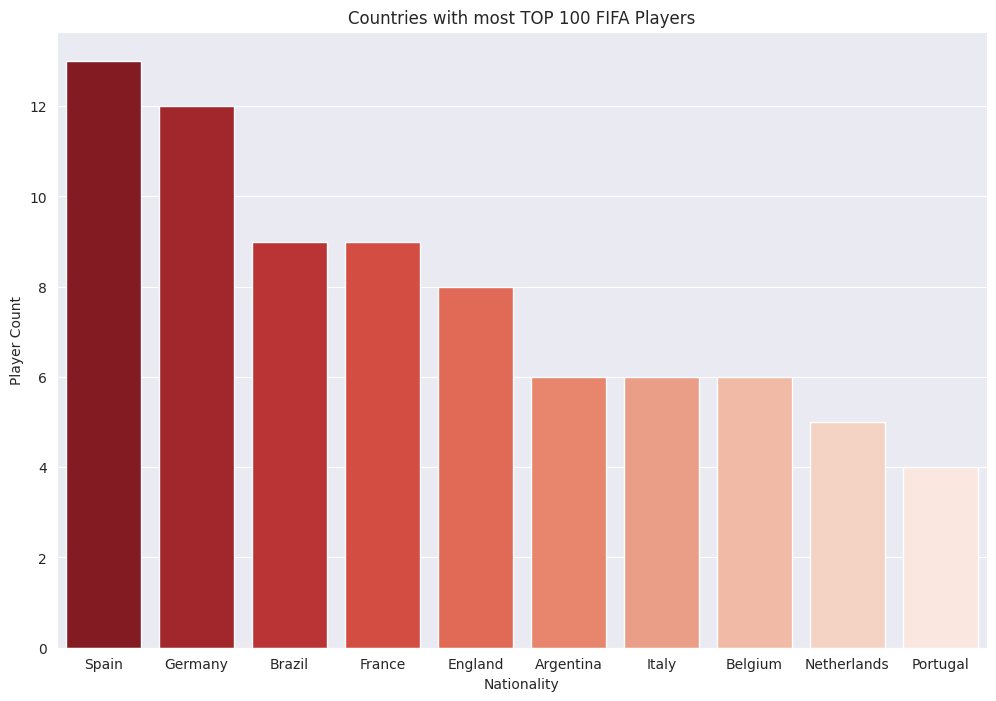

In [120]:
plt.figure(figsize=(12,8))
sns.barplot(x='Nationality', y='Player Count', data=top_100_players, palette='Reds_r')
plt.title('Countries with most TOP 100 FIFA Players')
plt.show()

High value underpaid players

In [113]:
# correlation between Value and Wage
df_pc[['Value', 'Wage']].corr()

,Value,Wage
Value,1.00000,0.81487
Wage,0.81487,1.00000


In [ ]:
# The correlation between Value and Wage is high

<Figure size 1200x800 with 0 Axes>

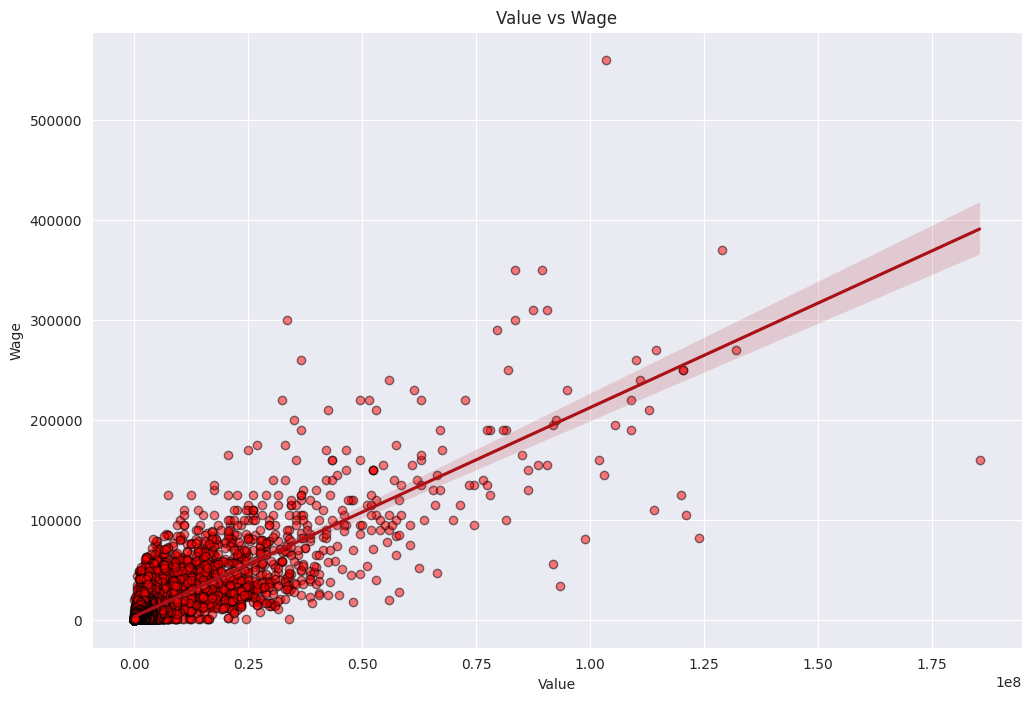

In [116]:
with sns.axes_style("darkgrid"):
  plt.figure(figsize=(12,8))
  sns.regplot(x = 'Value', y='Wage', data=df_pc,
            scatter_kws={'edgecolor' : 'black', 'linewidth' : 1, 'alpha':0.5, 'color' : 'red'})
  plt.title('Value vs Wage')
  plt.show()

In [121]:
# All the players below the red line can be considered underpaid

In [122]:
# most players are valued up to 50m and their wage is mostly below 100k
# who are the outliers here?
    # there is one player who has above 500k wage while having ~100m value
    # the most valuable player on the list has a wage below 200k

In [127]:
# player with 500k+ wage
highest_paid_player = df_pc[df_pc['Wage'] > 500000]
highest_paid_player[['Name', 'Age', 'Club', 'Best Position', 'Value', 'Wage']]

,Name,Age,Club,Best Position,Value,Wage
0,L. Messi,33,FC Barcelona,RW,103500000,560000


In [128]:
# most valuable player
most_valuable_player = df_pc[df_pc['Value'] > 150000000]
most_valuable_player[['Name', 'Age', 'Club', 'Best Position', 'Value', 'Wage']]

,Name,Age,Club,Best Position,Value,Wage
8,K. Mbappé,21,Paris Saint-Germain,ST,185500000,160000


In [129]:
# underpaid players
# players valued over 75m and being paid under 150k can surely be considered underpaid
# lets see who they are
underpaid_players = df_pc[(df_pc['Value'] > 75000000) & (df_pc['Wage'] < 150000)].sort_values(by='Wage')[['Name', 'Age', 'Club', 'Best Position', 'Value', 'Wage']]
underpaid_players

,Name,Age,Club,Best Position,Value,Wage
69,G. Donnarumma,21,Milan,GK,93500000,34000
105,E. Haaland,19,Borussia Dortmund,ST,92000000,56000
66,M. de Ligt,20,Juventus,CB,99000000,81000
29,J. Sancho,20,Borussia Dortmund,CAM,124000000,82000
71,L. Sané,24,FC Bayern München,LM,81500000,100000
65,K. Havertz,21,Chelsea,CAM,121000000,105000
30,T. Alexander-Arnold,21,Liverpool,RB,114000000,110000
2,J. Oblak,27,Atlético Madrid,GK,120000000,125000
47,C. Immobile,30,Lazio,ST,78000000,125000
104,L. Martínez,22,Inter,ST,86500000,130000


Wages per Position & Age

In [130]:
wage_vs_position = df_pc.groupby(['Age','Best Position'])['Wage'].sum().unstack()

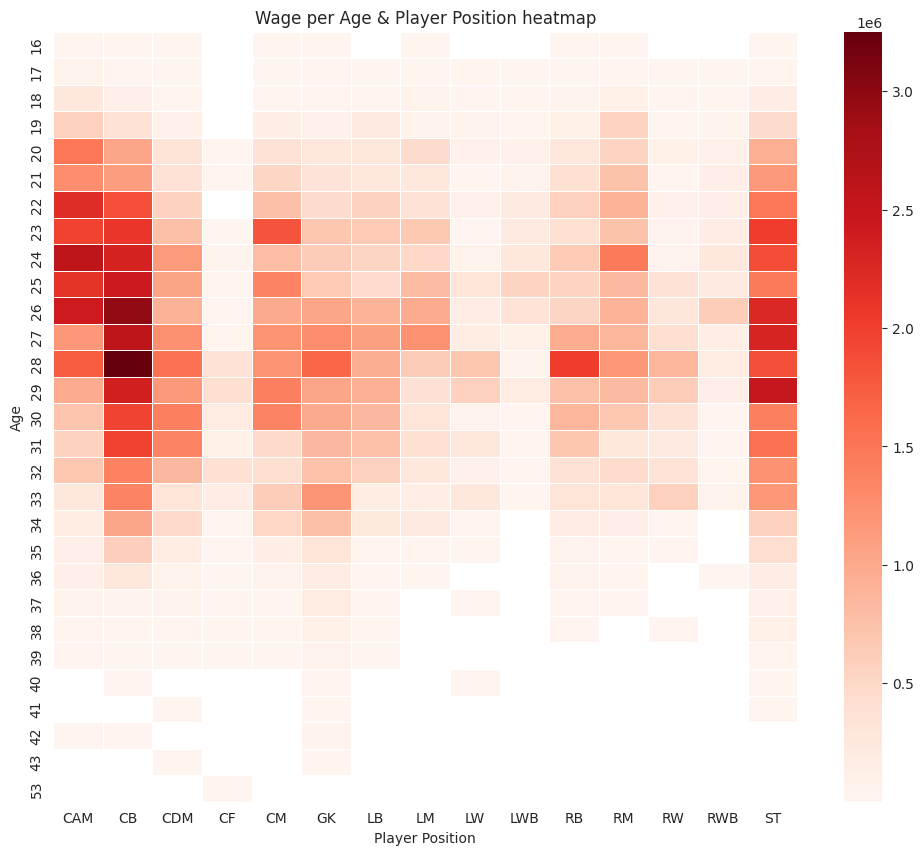

In [134]:
with sns.axes_style("white"):
  plt.figure(figsize=(12,10))
  sns.heatmap(wage_vs_position, linecolor='white', linewidth=0.5, cmap='Reds')
  plt.xlabel('Player Position')
  plt.title('Wage per Age & Player Position heatmap')
  plt.show()

Wage per Clubs overall rating

In [137]:
ova_wage = df_pc.groupby('Club')[['Wage', 'Overall Rating', 'Age']].agg({'Wage':'sum', 'Overall Rating': 'sum', 'Age': 'mean'})
ova_wage = ova_wage.reset_index().sort_values('Overall Rating', ascending=False)[1:]
ova_wage['Age'] = ova_wage['Age'].round(decimals=1)
ova_wage

,Club,Wage,Overall Rating,Age
131,Chelsea,2534000,2580,25.1
387,Manchester United,2986000,2577,25.2
374,Liverpool,3028500,2554,24.6
613,Tottenham Hotspur,2495000,2538,24.9
214,FC Barcelona,4083000,2533,24.2
...,...,...,...,...
456,Perth Glory,45200,1123,26.6
29,Adelaide United,17450,1089,24.2
99,Brisbane Roar,19400,1077,25.2
392,Melbourne Victory,32800,1060,23.3


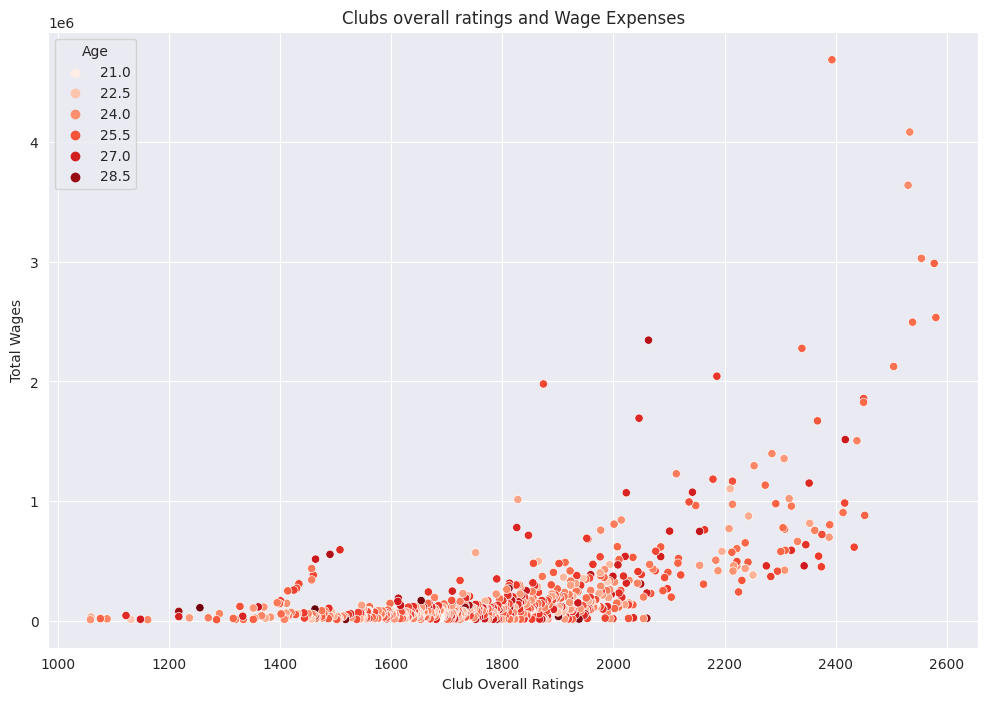

In [140]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Overall Rating', y='Wage', data = ova_wage, hue='Age', palette='Reds')
plt.xlabel('Club Overall Ratings')
plt.ylabel('Total Wages')
plt.title('Clubs overall ratings and Wage Expenses')
plt.show()

In [ ]:
# with the clubs Overall rating exceeding the 2200's , the wage expenses start to dramatically rise while the Overall rating changes insignificant

In [157]:
value_vs_age = df_pc.sort_values(by='Value', ascending=False)[:200]
value_vs_age[['Name', 'Age', 'Value']].head(10)

,Name,Age,Value
8,K. Mbappé,21,185500000
4,Neymar Jr,28,132000000
3,K. De Bruyne,29,129000000
29,J. Sancho,20,124000000
65,K. Havertz,21,121000000
6,M. Salah,28,120500000
11,S. Mané,28,120500000
2,J. Oblak,27,120000000
18,R. Sterling,25,114500000
30,T. Alexander-Arnold,21,114000000


<ipython-input-144-35f71a194848>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Age', y='Value', data=value_vs_age, palette='Reds')


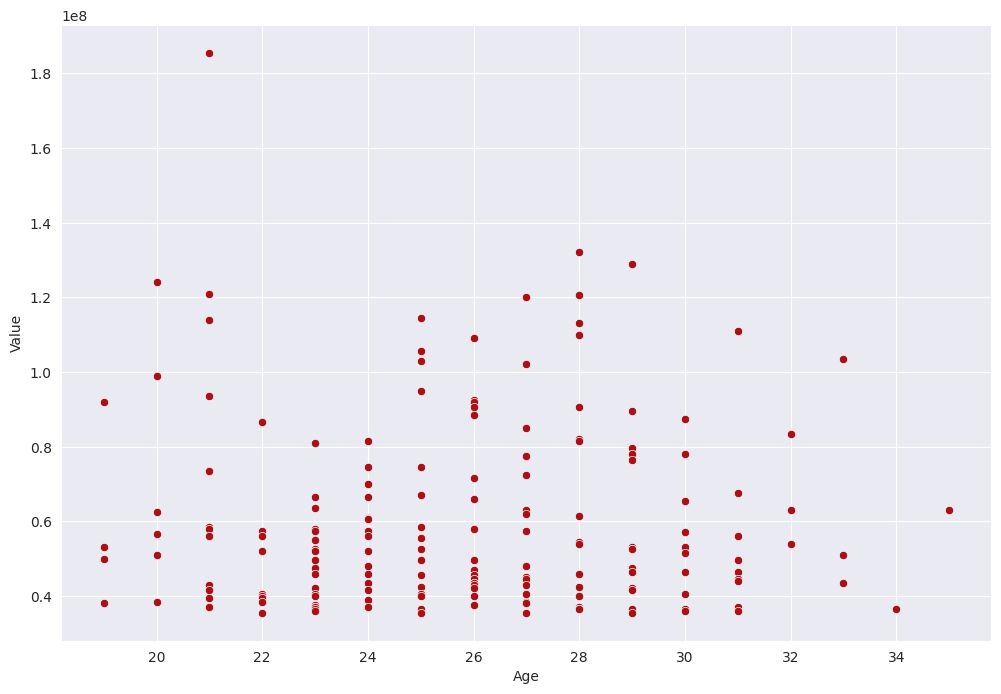

In [144]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Age', y='Value', data=value_vs_age, palette='Reds')
plt.show()

In [ ]:
# By looking at the scatter plot we can see that there is 1 outlier who is valued above 180M
# As we have established in the previous section, that player is Mbappe and he is also being significantly underpaid in regards to his value
# to get a better understanding on players distributions in regards to Age and Value we will create a joint plot where he will be disregarded.

In [146]:
value_plt = value_vs_age[value_vs_age['Name'] != 'K. Mbappé']

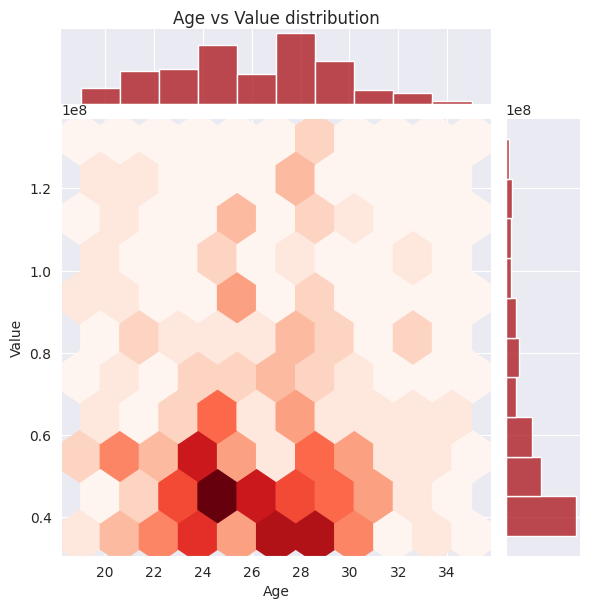

In [155]:
sns.jointplot(x='Age', y='Value', data=value_plt, kind='hex', cmap='Reds')
plt.title('Age vs Value distribution', y=1.2)
plt.show()

In [ ]:
# in the analyzed data, most players are valued below 50M and are aged between 22 and 30
# the Outliers here are showing us valuable insights on who are the most valuable players
# the highest valued players are around 20 years old and around 28 years,
# the former being players with big potentitals at top clubs (Mbappe, Sancho, Havertz)
# the latter being the years majority of top players reach their peak (Neymar, De Bruyne, Salah, Mane)